# Fitting Non-Linear Data using PyTorch

## Create Basic Function

In [218]:
# Base Code

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import random

In [219]:
def create_nonlinear_data(xmin = -10, xmax = 10, num_data = 100, theta_0 = 0, theta_1 = .3, theta_2 = .05, noise = .1):


    X = np.linspace(xmin, xmax, num=num_data)
    y = theta_0 + theta_1*X*np.cos(X) + theta_2*X**2 + noise*np.random.normal(size=num_data)

    X = torch.from_numpy(X)
    y = torch.from_numpy(y)
    X = X.view((len(X), 1))
    y = y.view((len(y), 1))

    return X, y

In [220]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["axes.labelsize"] = 16
block_plot = False

def plot_data(x, y, xlim=(0, 10), ylim=(0, 10)):
    plt.figure
    plt.plot(x, y, "b.")
    plt.xlabel("x")
    plt.ylabel("y"),
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show(block=block_plot)

## Generate Non-linear Data

In [221]:
theta_0 = -13
theta_1 = 5
theta_2 = 0.2
X, y = create_nonlinear_data(theta_0 = theta_0, theta_1 = theta_1, theta_2 = theta_2, noise = 2)

# Create two features from the input data that match the functional form of the data we generated above.
Xf = torch.cat((X*torch.cos(X), X*X), axis = 1).float()
temp = Xf.numpy()
print('Xf contains two features based on X: ', temp.shape)

Xf contains two features based on X:  (100, 2)


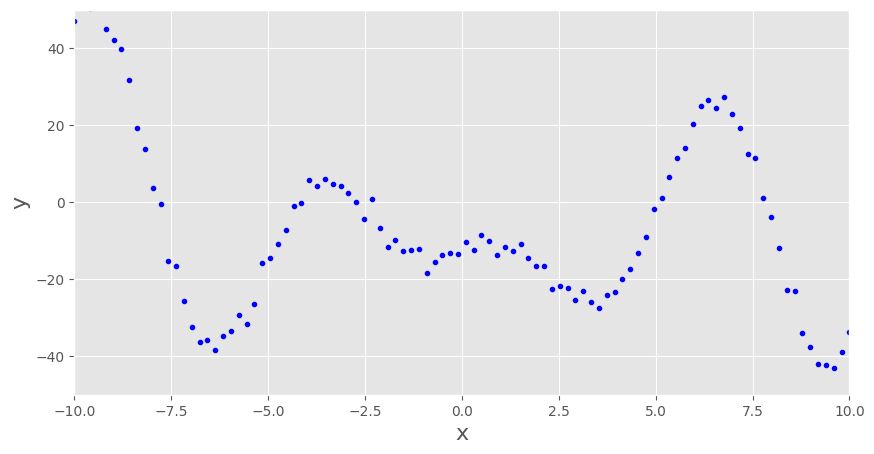

In [222]:
plot_data(X, y, (-10,10), (-50,50))

## Create the Pytorch Model

In [223]:
model = nn.Linear(in_features=2, out_features=1)

## Compile the Model

In [224]:
optimizer = optim.Adam(model.parameters())
criterion = torch.nn.MSELoss()

## Train the Model

In [225]:
loss_curve=[]

for epoch in range(10000):
    optimizer.zero_grad()
    output = model(Xf)
    loss = criterion(output, y.float())
    loss.backward()
    optimizer.step()
    loss_curve.append(loss.detach().numpy().item())

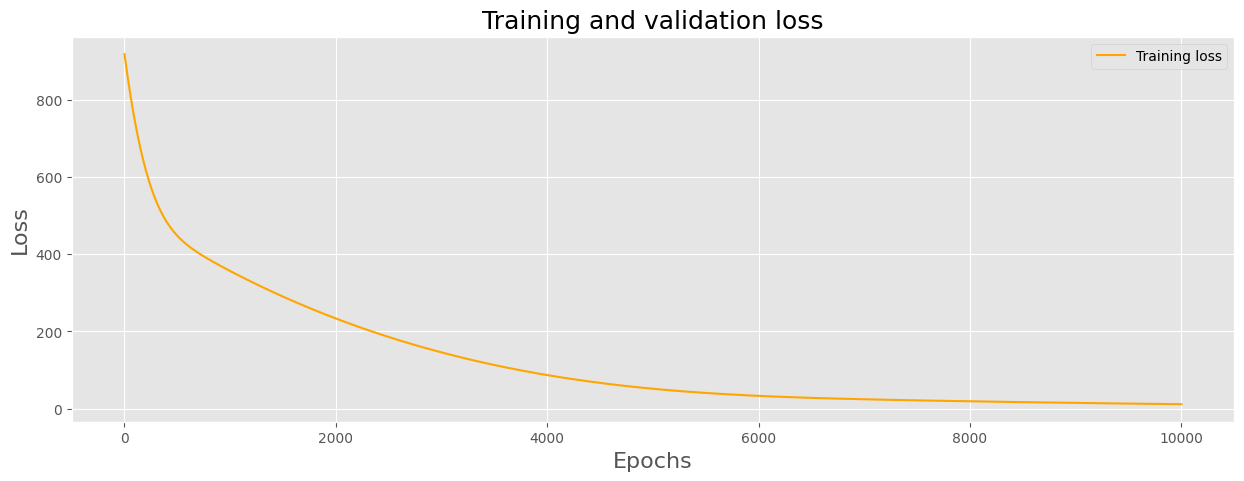

In [226]:
loss_values = loss_curve
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize = [15, 5])
plt.plot(epochs, loss_values, "orange", label="Training loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Predict Model Parameters and Display Results

In [227]:
pred_theta_0 = model.state_dict()['bias'][0].numpy();
temp = model.state_dict()['weight'][0].numpy();
pred_theta_1 = temp[0]
pred_theta_2 = temp[1]

print('Actual Coefficients:\n')
print('theta_0 = ', theta_0)
print('theta_1 = ', theta_1)
print('theta_2 = ', theta_2)
print('\n')
print('Predicted Coefficients:\n')
print('theta_0 = ', pred_theta_0)
print('theta_1 = ', pred_theta_1)
print('theta_2 = ', pred_theta_2)

pred_y = model(Xf).detach().numpy()

Actual Coefficients:

theta_0 =  -13
theta_1 =  5
theta_2 =  0.2


Predicted Coefficients:

theta_0 =  -8.8981495
theta_1 =  4.9285607
theta_2 =  0.12600167


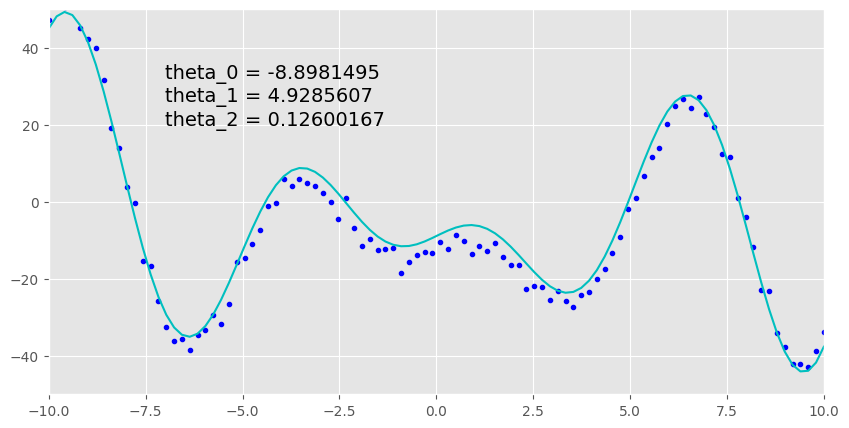

In [233]:
plt.plot(X, y, 'b.')
plt.plot(X, pred_y, 'c-')
plt.text(-7, 32.0, 'theta_0 = ' + str(pred_theta_0),    fontsize=14)
plt.text(-7, 26.0, 'theta_1 = ' + str(pred_theta_1), fontsize=14)
plt.text(-7, 20.0, 'theta_2 = ' + str(pred_theta_2), fontsize=14)

plt.xlim(-10, 10)
plt.ylim(-50, 50)
plt.show()
